In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('GlobalTemperatures.csv', encoding='ascii')

# Convert 'dt' column to datetime format
df['dt'] = pd.to_datetime(df['dt'])

# Fill missing values in temperature columns with their respective means
for column in ['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
               'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
               'LandMinTemperature', 'LandMinTemperatureUncertainty',
               'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']:
    df[column].fillna(df[column].mean(), inplace=True)

print('Data cleaning completed.')
print(df.info())

C:\Users\sparmar\AppData\Local\Temp\ipykernel_20836\1002781332.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Data cleaning completed.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3192 non-null   float64       
 2   LandAverageTemperatureUncertainty          3192 non-null   float64       
 3   LandMaxTemperature                         3192 non-null   float64       
 4   LandMaxTemperatureUncertainty              3192 non-null   float64       
 5   LandMinTemperature                         3192 non-null   float64       
 6   LandMinTemperatureUncertainty              3192 non-null   float64       
 7   LandAndOceanAverageTemperature             3192 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  3192 non-null   float64       


C:\Users\sparmar\AppData\Local\Temp\ipykernel_20836\1002781332.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


Plot 2: Global Maximum and Minimum Land Temperature Over Time displayed.


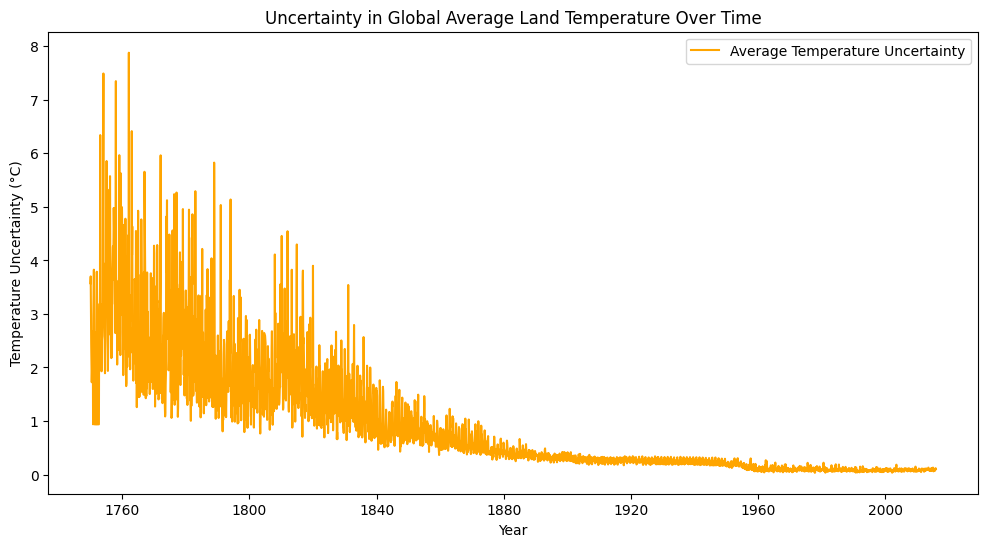

In [2]:
print('Plot 2: Global Maximum and Minimum Land Temperature Over Time displayed.')
# Plot Uncertainty in Global Average Land Temperature Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dt', y='LandAverageTemperatureUncertainty', data=df, color='orange', label='Average Temperature Uncertainty')
plt.title('Uncertainty in Global Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature Uncertainty (°C)')
plt.legend()
plt.show()

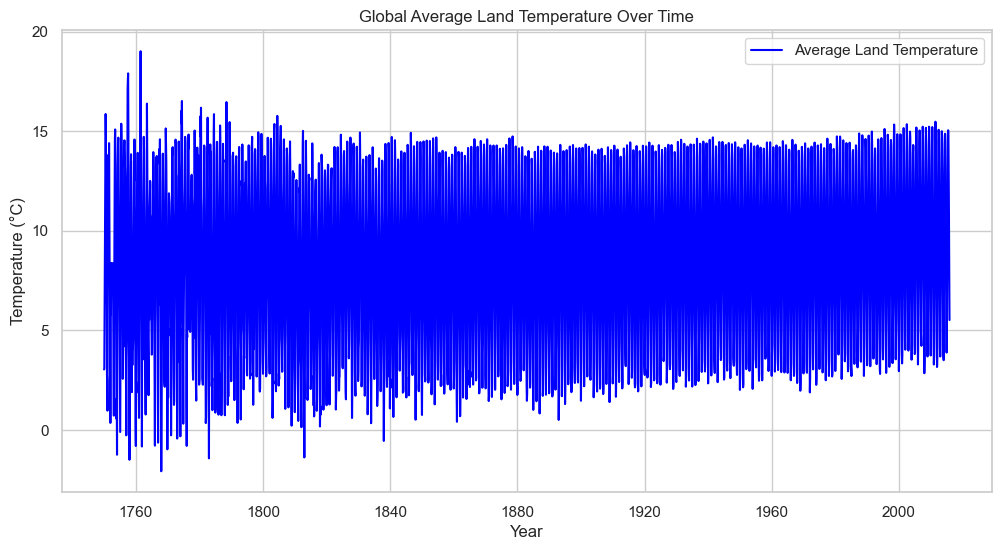

In [3]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Plot Global Average Land Temperature Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='dt', y='LandAverageTemperature', data=df, color='blue', label='Average Land Temperature')
plt.title('Global Average Land Temperature Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

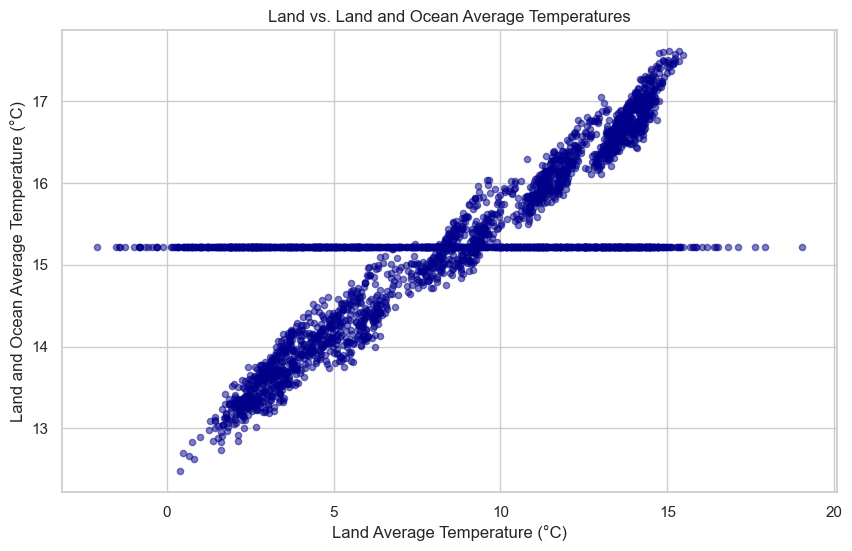

In [4]:
# Create a scatter plot
df.plot(kind='scatter', x='LandAverageTemperature', y='LandAndOceanAverageTemperature', alpha=0.5, color='darkblue', figsize=(10, 6))
plt.title('Land vs. Land and Ocean Average Temperatures')
plt.xlabel('Land Average Temperature (°C)')
plt.ylabel('Land and Ocean Average Temperature (°C)')
plt.show()

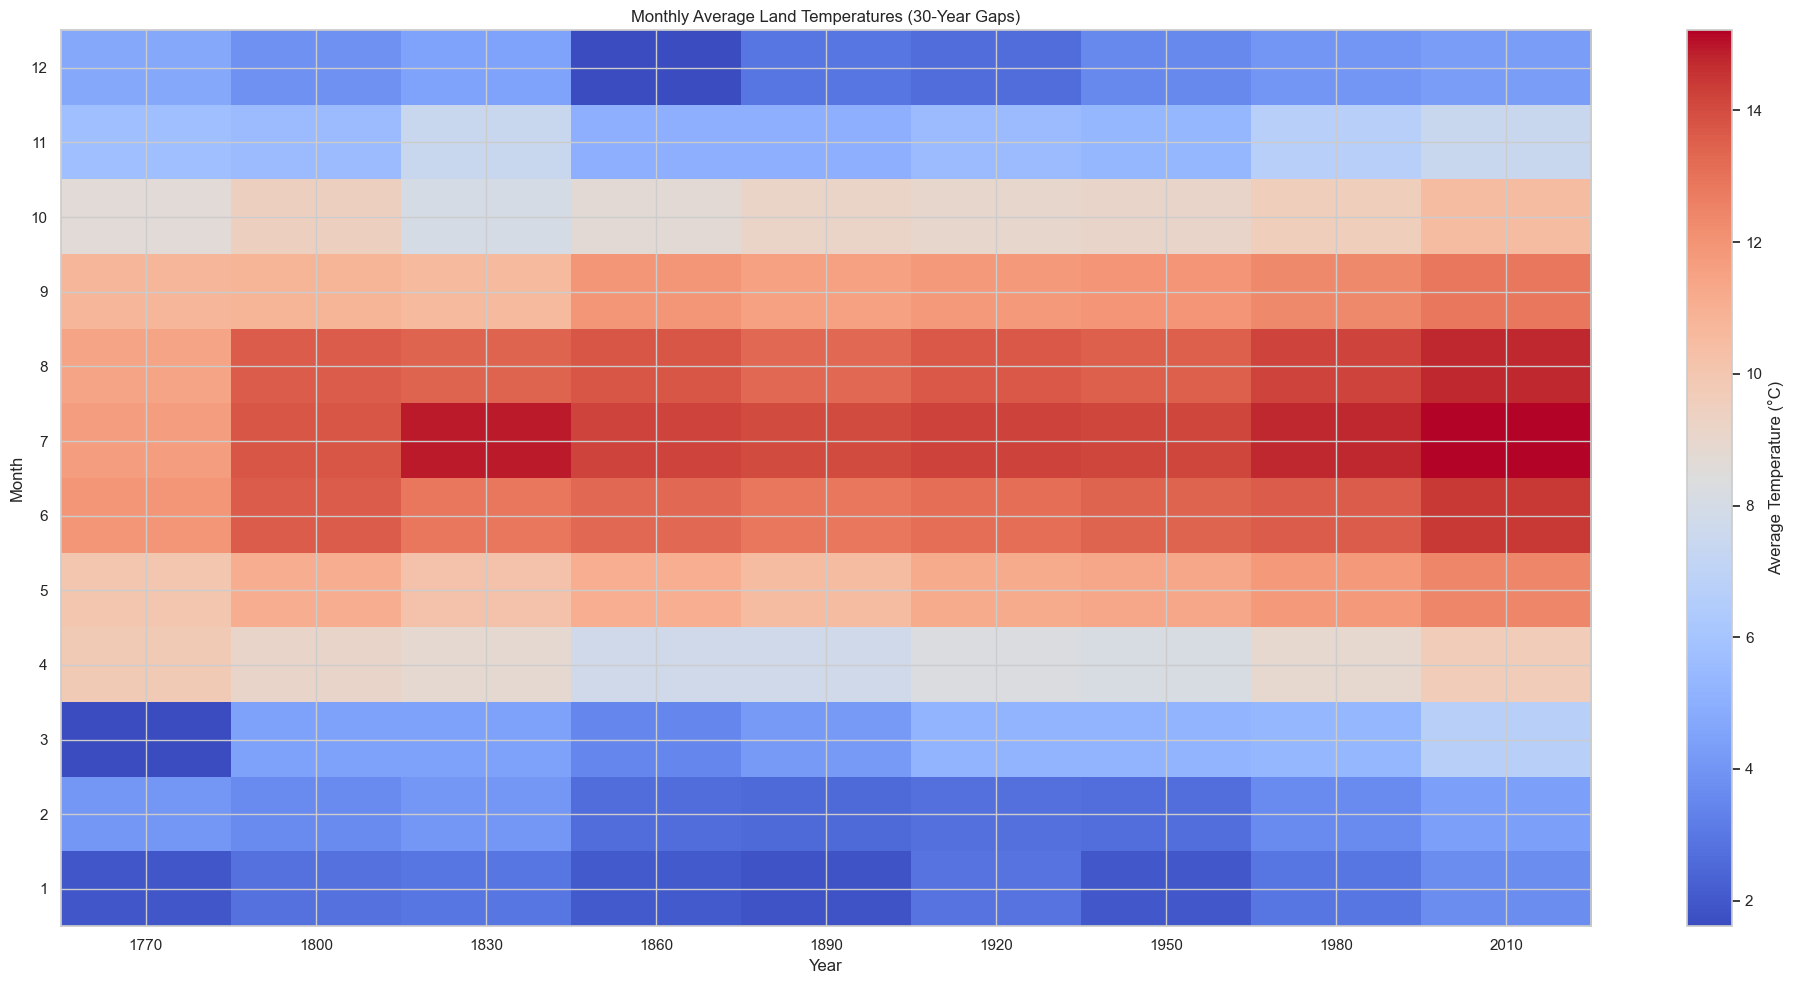

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
#file_path = 'GlobalTemperatures.csv'
#df = pd.read_csv(file_path, parse_dates=['dt'], encoding='ascii')

# Extract year and month from the date
df['Year'] = df['dt'].dt.year
df['Month'] = df['dt'].dt.month

# Filter the data to include only years that are multiples of 30 to get a 30-year gap
filtered_df = df[df['Year'] % 30 == 0]

# Calculate monthly averages for the filtered data
monthly_avg_temps_filtered = filtered_df.groupby(['Year', 'Month']).mean().reset_index()

temperature_pivot_filtered = monthly_avg_temps_filtered.pivot_table(index='Month', columns='Year', values='LandAverageTemperature')

# Create the heatmap
plt.figure(figsize=(20, 10), facecolor='white')
plt.imshow(temperature_pivot_filtered, cmap='coolwarm', aspect='auto', origin='lower')
plt.colorbar(label='Average Temperature (°C)')
plt.title('Monthly Average Land Temperatures (30-Year Gaps)')
plt.xlabel('Year')
plt.ylabel('Month')
plt.xticks(np.arange(len(temperature_pivot_filtered.columns)), temperature_pivot_filtered.columns)
plt.yticks(np.arange(len(temperature_pivot_filtered.index)), temperature_pivot_filtered.index)
plt.tight_layout()
plt.show()


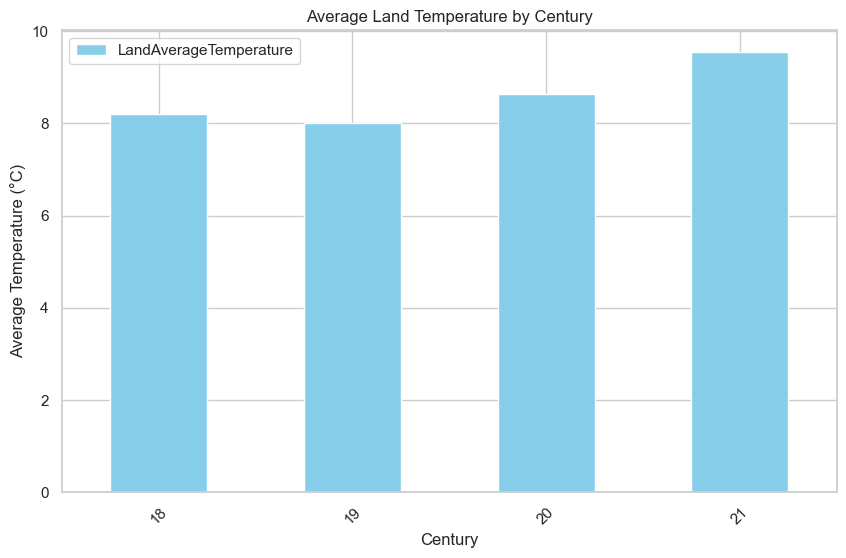

In [6]:
df['Century'] = df['dt'].dt.year // 100 + 1

# Calculate the average temperature by century
df_century_avg = df.groupby('Century')['LandAverageTemperature'].mean().reset_index()

# Create a bar chart
df_century_avg.plot(kind='bar', x='Century', y='LandAverageTemperature', color='skyblue', figsize=(10, 6))
plt.title('Average Land Temperature by Century')
plt.xlabel('Century')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()

## **Conclusion:**

In summary, our exploration of global temperature trends tells a fascinating story of our planet's changing climate over the centuries. Combining land and ocean temperature data reveals a consistent upward trend, with recent years showing a rapid increase. This data also highlights the crucial role oceans play in moderating temperature fluctuations.

The bar chart emphasizes the significant rise in land temperatures, particularly in the 21st century, echoing concerns about accelerated climate change. Furthermore, the scatter plot shows a strong correlation between land and ocean temperatures, underscoring their interconnectedness in shaping our climate. Lastly, the heatmap vividly portrays seasonal variations and long-term warming trends in monthly land temperatures. Together, these visualizations provide valuable insights into the urgency of addressing climate change and the complex dynamics of our planet's climate system.